In [24]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import gdelt
import pycountry


%matplotlib inline

gdelt = gdelt.gdelt(version=2)

In [25]:
startyear = '2016'
startmonth = '12'
startday = '1'
startdate = startyear + ' ' + startmonth + ' ' + startday
endyear = '2016'
endmonth = '12'
endday = '31'
enddate = endyear + ' ' + endmonth + ' ' + endday

In [26]:
results = gdelt.Search([startdate,enddate],table='events')[['MonthYear','Actor1CountryCode','Actor2CountryCode','AvgTone','ActionGeo_Lat','ActionGeo_Long']].dropna()

In [27]:
results.shape

(11727, 6)

In [28]:
results.columns

Index(['MonthYear', 'Actor1CountryCode', 'Actor2CountryCode', 'AvgTone',
       'ActionGeo_Lat', 'ActionGeo_Long'],
      dtype='object')

In [29]:
results.describe()

,MonthYear,AvgTone,ActionGeo_Lat,ActionGeo_Long
count,11727.00000,11727.000000,11727.000000,11727.000000
mean,201610.60689,-1.962961,32.294055,-0.503231
std,17.02312,3.577177,20.836167,78.348919
min,200612.00000,-20.618557,-85.622100,-176.533000
25%,201612.00000,-4.195804,29.424100,-77.036400
50%,201612.00000,-1.781170,36.528200,10.000000
75%,201612.00000,0.578035,42.833300,44.000000
max,201612.00000,10.162602,72.000000,179.700000


In [30]:
results.head()

,MonthYear,Actor1CountryCode,Actor2CountryCode,AvgTone,ActionGeo_Lat,ActionGeo_Long
7,201512,USA,CHN,-0.286533,38.8951,-77.0364
8,201512,USA,CHN,-0.286533,35.0000,105.0000
9,201512,USA,TWN,-0.286533,38.8951,-77.0364
20,201612,ZAF,AFR,-6.607795,-29.0503,26.1122
21,201612,ZAF,ZAF,-6.607795,-29.0503,26.1122


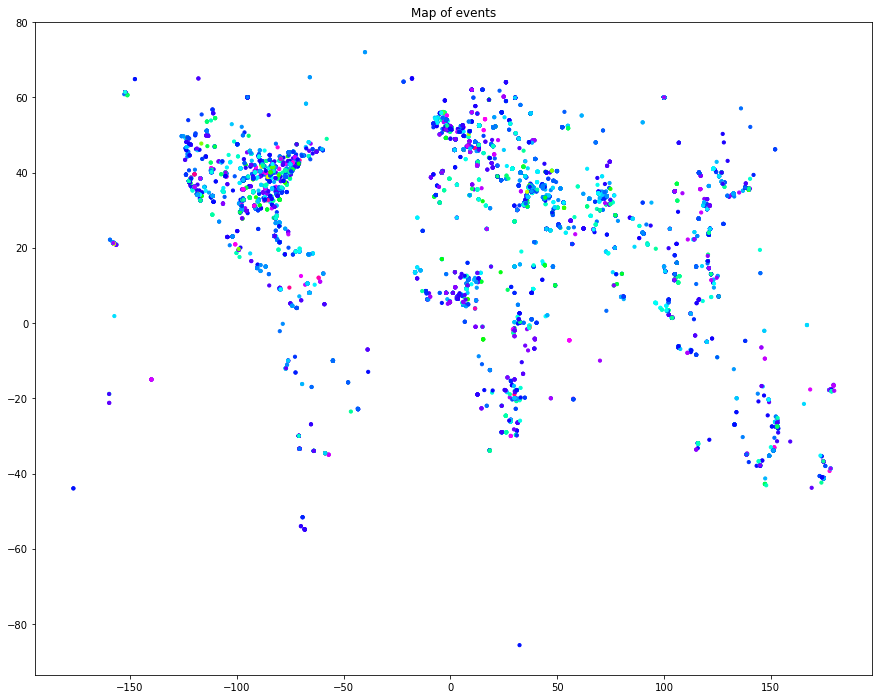

In [31]:
x = results['ActionGeo_Long']
y = results['ActionGeo_Lat']

tone = results['AvgTone']

plt.figure(figsize=(15, 12))
plt.title('Map of events')
plt.scatter(x, y, c=tone, cmap=cm.hsv, s=10)

In [32]:
list(pycountry.countries)[1]

Country(alpha_2='AF', alpha_3='AFG', name='Afghanistan', numeric='004', official_name='Islamic Republic of Afghanistan')

In [33]:
import requests

In [35]:
moondate = startday + '/' + startmonth + '/' + startyear
nump = '1'
payload = 'date=' + moondate + '&nump=' + nump
moon = requests.get("http://api.usno.navy.mil/moon/phase?", params=payload)
moon.text

'{\n      "error":false,\n      "apiversion":"2.0.0",\n      "year":2016,\n      "month":1,\n      "day":12,\n      "numphases":1,\n      "datechanged":false, \n      "phasedata":[\n            {\n               "phase":"First Quarter",\n               "date":"2016 Jan 16",\n               "time":"23:26"\n            }\n      ]\n   }'

Check out - https://zapier.com/learn/apis/chapter-2-protocols/

http://aa.usno.navy.mil/data/docs/api.php